# **1 - *Description of the Dataset***

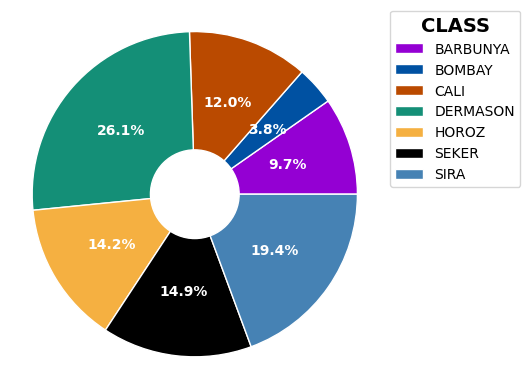

In [117]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import pearsonr
from utils.Plots import Donutplot
# import dataframe_image as dfi

color = {"granate":"#BA4A00",
         "amarillo":"#F5B041",
         "verde":"#148F77",
         "blue":"#0051A2",
         "red": "#DD1717"}

In [ ]:

#plt.savefig('/Users/diego/Documents/UNIOVI/TFG/LATEX/Media/proporcion.jpg', dpi = 500)

# Estandarizamos cada variable
features_stdr = (features - features.mean(0,numeric_only = True))/features.std(0,numeric_only = True)
df_stdr = pd.concat([df['diagnosis'],features_stdr],axis = 1)
df_stdr.diagnosis = df_stdr.diagnosis.replace('M','Maligno')
df_stdr.diagnosis = df_stdr.diagnosis.replace('B','Benigno')
df_stdr.rename({'diagnosis': 'Diagnostico'}, axis=1, inplace=True)
# Boxplots
variable_names = []
data_melt = df_stdr.melt(id_vars = 'Diagnostico',var_name = 'feature',value_name = 'value') # se transforma el dataset
# para el plot
sb.set_theme(style="ticks")
tipos = ['media estandarizadas','error estándar estandarizadas', 'peor medida estandarizadas']
for i in range(len(types)):
    fig, ax = plt.subplots(figsize = (15,5))
    data = data_melt[(data_melt['feature'].str.contains(types[i]))]
    # Hacemos un boxplot agrupando por tipo de diagnostico
    sb.boxplot(x = "feature", y = "value", hue = "Diagnostico", data = data,ax = ax,palette = {'Maligno': color["red"],'Benigno': color["blue"]})
    ax.legend(loc = 'upper left', fontsize = 8)
    ax.set_ylim((-3,5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize = 10)
    ax.set_title(f'Variables de tipo {tipos[i]}',fontsize = 20)
    fig.savefig(f'/Users/diego/Documents/UNIOVI/TFG/LATEX/Media/boxplot_{types[i]}.jpg', dpi = 500,bbox_inches='tight')

# Realizamos un Scatter plot para comparar las correlaciones entre variables
dat = df_stdr.iloc[:,df_stdr.columns.str.contains('mn|Diagnostico')]
sb.set_context("paper", rc={"axes.labelsize": 7})
p = sb.pairplot(dat,hue = 'Diagnostico',palette = {'Maligno': color["red"],'Benigno': color["blue"]},markers = ['o','D'],
            height = 1,aspect = 1)
plt.savefig('/Users/diego/Documents/UNIOVI/TFG/LATEX/Media/pairplot_mean.jpg', dpi = 500)
# Hipótesis previas para poder aplicar un test de Pearson: Normalidad de las variables:
p_values = []
for var in features.columns:
    p_values.append(stats.shapiro(features[var])[1])
# Además se incluye un mapa de calor de correlaciones entre todas las variables

fig,ax = plt.subplots(figsize = (19,7))
a = features_stdr.corr()
mask = np.triu(np.ones_like(a, dtype = bool))
sb.heatmap(a, mask = mask,vmin=-0.3, vmax=1, annot=True,fmt = '.1f',linewidths = 0.3,ax = ax,cmap = 'Reds')
fig.savefig('/Users/diego/Documents/UNIOVI/TFG/LATEX/Media/heatmap_mean.jpg', dpi = 700,bbox_inches='tight')

 # Por la dificultad de comparación debido al alto número de variables, se plantea una reducción de la dimension
 # empleando un analisis de componentes principales (sería correcto hacer un feature analisis en lugar del PCA?: No)
dat1 = df_stdr.iloc[:,df_stdr.columns.str.contains('Area_mn|Dimension_fractal_mn|Diagnostico')]
sb.set_context("paper", rc={"axes.labelsize": 7})
p = sb.pairplot(dat1,hue = 'Diagnostico',corner = True,palette = {'Maligno': color["red"],'Benigno': color["blue"]},markers = ['o','D'],
            height = 2,aspect = 1)
plt.savefig('/Users/diego/Documents/UNIOVI/TFG/LATEX/Media/pairplot1_mean.jpg', dpi = 500)
dat1.corr()
# PAirplot de las se
dat = df_stdr.iloc[:,df_stdr.columns.str.contains('se|Diagnostico')]
sb.set_context("paper", rc={"axes.labelsize": 7})
p = sb.pairplot(dat,hue = 'Diagnostico',palette = {'Maligno': color["red"],'Benigno': color["blue"]},markers = ['o','D'],
            height = 1,aspect = 1)
plt.savefig('/Users/diego/Documents/UNIOVI/TFG/LATEX/Media/pairplot_se.jpg', dpi = 500)
# Pairplot de las worst
dat = df_stdr.iloc[:,df_stdr.columns.str.contains('ws|Diagnostico')]
sb.set_context("paper", rc={"axes.labelsize": 7})
p = sb.pairplot(dat,hue = 'Diagnostico',palette = {'Maligno': color["red"],'Benigno': color["blue"]},markers = ['o','D'],
            height = 1,aspect = 1)
plt.savefig('/Users/diego/Documents/UNIOVI/TFG/LATEX/Media/pairplot_ws.jpg', dpi = 500)
a = pd.read_csv(r'/Users/diego/Documents/UNIOVI/TFG/DATA/Breast_cancer_spanish.csv')
data_mean = a.iloc[:,2:12]
pv = pd.DataFrame(0, index=data_mean.columns, columns=data_mean.columns)
cor = pd.DataFrame(0, index=data_mean.columns, columns=data_mean.columns)
for i,v1 in enumerate(data_mean.columns):
    for j,v2 in enumerate(data_mean.columns):
        c,p = pearsonr(data_mean[v1], data_mean[v2])
        pv.loc[v1,v2] = p
        cor.loc[v1,v2] = c

### ***1.1 - Loading the dataset***

In [14]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv('Data/Dry_Bean_Dataset.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [52]:
columns = df.columns.values
X = df.drop(columns='Class').values
y = df['Class']

print('· NUMBER OF FEATURES:', X.shape[1])
print('\n· FEATURES:', columns[:-1])
print('\n· NUMBER OF DATA POINTS:', X.shape[0])
print('\n· CLASSES:', y.unique())
print('\n· NUMBER OF CLASSES:', len(y.unique()))


· NUMBER OF FEATURES: 16

· FEATURES: ['Area' 'Perimeter' 'MajorAxisLength' 'MinorAxisLength' 'AspectRation'
 'Eccentricity' 'ConvexArea' 'EquivDiameter' 'Extent' 'Solidity'
 'roundness' 'Compactness' 'ShapeFactor1' 'ShapeFactor2' 'ShapeFactor3'
 'ShapeFactor4']

· NUMBER OF DATA POINTS: 13611

· CLASSES: ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']

· NUMBER OF CLASSES: 7


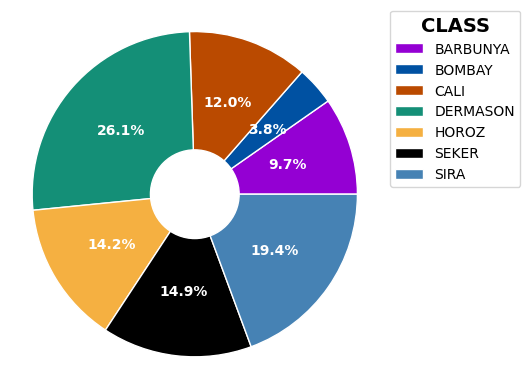

In [118]:
size = np.unique(y, return_counts=True)[1].tolist()
names = np.unique(y, return_counts=True)[0].tolist()
d = Donutplot(sizes = size ,colors = ('darkviolet', color["blue"], color['granate'], color['verde'], color['amarillo'],'black', 'steelblue'),
circle_ratio = 0.3)
d.plot()
plt.legend(names ,loc = 'lower right',title = 'CLASS',bbox_to_anchor=(1.4, 0.5), title_fontproperties={'weight':'bold', 'size':14});

#  **2 - *Detailed explanation of the attributes of the data***

In [57]:
from sklearn.preprocessing import StandardScaler

In [61]:
# Standarization of the dataset
sc = StandardScaler()
X_stdz = sc.fit_transform(X)
df_stdz = pd.DataFrame(columns = columns[:-1], data = X_stdz)

<AxesSubplot:>

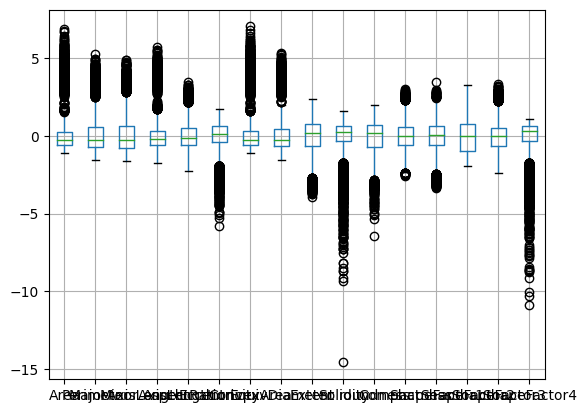

# 1. Load dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
import toolbox_02450

In [7]:
file_dir = 'DryBeanDataset/Dry_Bean_Dataset.csv'
df = pd.read_csv(file_dir)
raw_data = df.values
# print(raw_data.shape)

cols = range(0,16)
X = raw_data[:, cols]
# print(X.shape)
attributeNames = np.asarray(df.columns[cols])
# print(attributeNames)
classLabels = raw_data[:,-1]
classNames = np.unique(classLabels)

# print(classNames)
classDict = dict(zip(classNames,range(len(classNames))))
y = np.array([classDict[cl] for cl in classLabels])

N, M = X.shape
C = len(classNames)
x = np.empty((N,M))
for i in range(len(X)):
    for j in range(len(X[i])):
        x[i, j] = float(X[i, j])
X = x

In [13]:
raw_data

array([[28395, 610.291, 208.1781167, ..., 0.834222388, 0.998723889,
        'SEKER'],
       [28734, 638.018, 200.5247957, ..., 0.909850506, 0.998430331,
        'SEKER'],
       [29380, 624.11, 212.8261299, ..., 0.825870617, 0.999066137,
        'SEKER'],
       ...,
       [42139, 759.321, 281.5399279, ..., 0.676884164, 0.996767264,
        'DERMASON'],
       [42147, 763.779, 283.3826364, ..., 0.668236684, 0.99522242,
        'DERMASON'],
       [42159, 772.237, 295.142741, ..., 0.616220592, 0.998179623,
        'DERMASON']], dtype=object)

Attribute Names: 'Area' 'Perimeter' 'MajorAxisLength' 'MinorAxisLength' 'AspectRation' 'Eccentricity' 'ConvexArea' 'EquivDiameter' 'Extent' 'Solidity' 'roundness' 'Compactness' 'ShapeFactor1' 'ShapeFactor2' 'ShapeFactor3' 'ShapeFactor4' \
Labels: 'BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA'

# 2 PCA

## 2.1 PCA on dataset

### 2.1.2

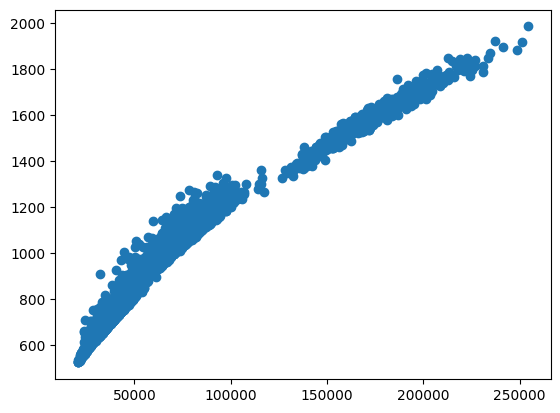

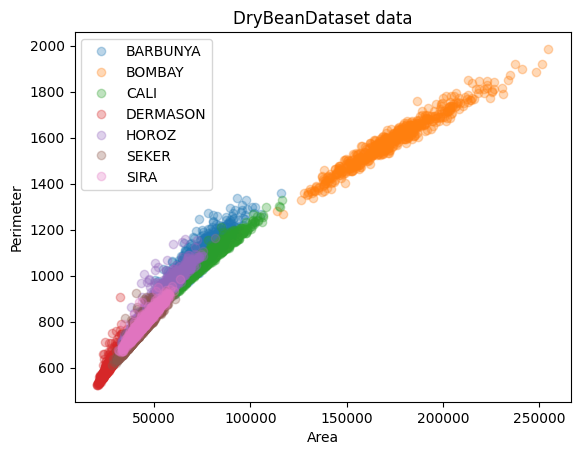

In [3]:
# Data attributes to be plotted
i = 0
j = 1

##
# Make a simple plot of the i'th attribute against the j'th attribute
# Notice that X is of matrix type (but it will also work with a numpy array)
# X = np.array(X) #Try to uncomment this line
plot(X[:, i], X[:, j], 'o')

# %%
# Make another more fancy plot that includes legend, class labels, 
# attribute names, and a title.
f = figure()
title('DryBeanDataset data')

for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(X[class_mask,i], X[class_mask,j], 'o',alpha=.3)

legend(classNames)
xlabel(attributeNames[i])
ylabel(attributeNames[j])

# Output result to screen
show()

### 2.1.3 Compute PCA

PCA computing method: \
subtracting the mean of the data: $Y=X-1\mu$($\mu$ is a vector which contains all the mean value of each attribute.) \
Then calculate the single value decomposition(SVD): $Y = USV^T$. \
Find out how much of the variation in the data each PCA component accounts for. \
$$
\rho_m = \frac{s_mm^2}{\sum_{m'=1}^Ms_{m',m'}^2}
$$

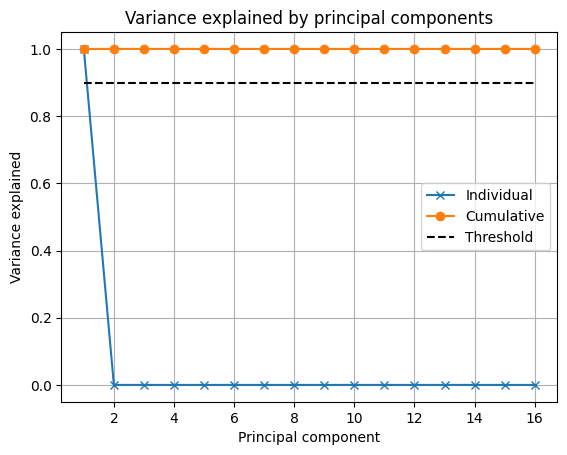

In [4]:
# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
# PCA by computing SVD of Y

U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

### 2.1.4

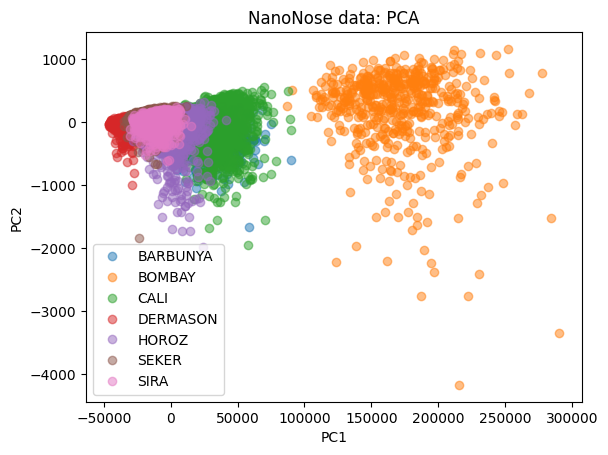

In [5]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('NanoNose data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

### 2.1.5

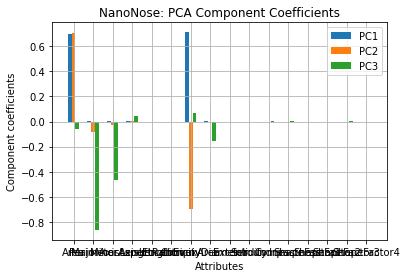

PC2:
[ 7.09856984e-01 -8.61298480e-02 -2.85583425e-02  4.85449714e-03
 -1.67155850e-04 -6.90030703e-05 -6.98425784e-01 -6.85090920e-03
  3.55685961e-05  1.76173284e-05  1.10294860e-04  4.86615921e-05
  1.21483043e-08  4.02461799e-07  7.88710919e-05  1.09057827e-05]
First water observation
[-2.00422845e+04 -1.44787459e+02 -3.71214826e+01 -5.26469955e+01
  3.08305614e-01  9.79339856e-02 -2.04142002e+04 -4.80653311e+01
 -1.14256555e-01  2.42362543e-03 -5.16457833e-02 -7.55381569e-02
  2.01120749e-03 -2.60020339e-04 -1.18942714e-01 -2.66765883e-03]
...and its projection onto PC2
44.25239805264215


In [83]:
Y = X - np.ones((N,1))*X.mean(0)
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.show()

# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:
print('PC2:')
print(V[:,1].T)

# How does this translate to the actual data and its projections?
# Looking at the data for water:

# Projection of water class onto the 2nd principal component.
all_water_data = Y[y==4,:]

print('First water observation')
print(all_water_data[0,:])

# Based on the coefficients and the attribute values for the observation
# displayed, would you expect the projection onto PC2 to be positive or
# negative - why? Consider *both* the magnitude and sign of *both* the
# coefficient and the attribute!

# You can determine the projection by (remove comments):
print('...and its projection onto PC2')
print(all_water_data[0,:]@V[:,1])


### 2.1.6 Standardization

Standardization a dataset by ensuring each attribute has a mean of zero and a variance of one. (zero mean and unit variance) 

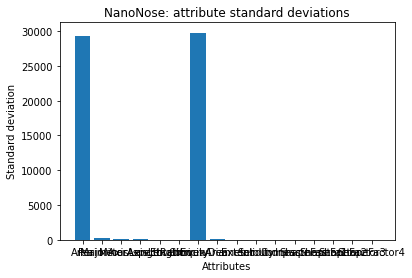

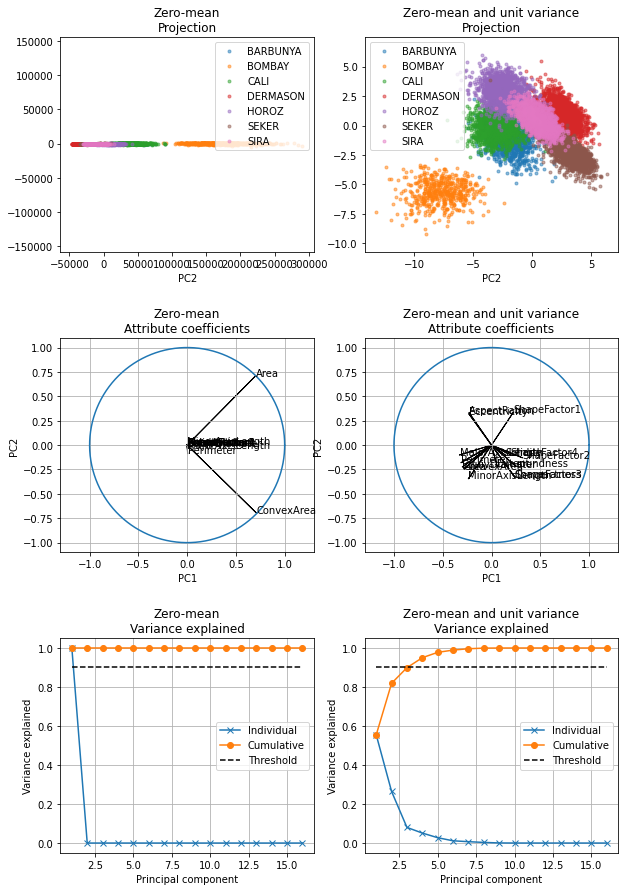

In [84]:


r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('NanoNose: attribute standard deviations')

## Investigate how standardization affects PCA

# Try this *later* (for last), and explain the effect
#X_s = X.copy() # Make a to be "scaled" version of X
#X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# Subtract the mean from the data
Y1 = X - np.ones((N, 1))*X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('NanoNose: Effect of standardization')
nrows=3
ncols=2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.xlabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')

plt.show()
        
         

In [103]:
matrix = np.empty((Y.shape[1], Y.shape[1]))
for i in range(Y.shape[1]):
    for j in range(Y.shape[1]):
        matrix[i, j] = np.corrcoef(Y2[:, i], Y2[:, j])[1, 0]
print(matrix)

16
[[ 1.          0.96672218  0.93183359  0.9516016   0.2417348   0.26748137
   0.99993923  0.98496752  0.05434485 -0.19658454 -0.35753034 -0.26806683
  -0.84795833 -0.63929075 -0.27214485 -0.35572143]
 [ 0.96672218  1.          0.97733775  0.91317856  0.38527565  0.39106554
   0.96768921  0.99138043 -0.02115958 -0.30396957 -0.54764667 -0.40685686
  -0.86462295 -0.76759233 -0.4084353  -0.42930978]
 [ 0.93183359  0.97733775  1.          0.82605155  0.55033477  0.54197162
   0.93260701  0.96173336 -0.07806191 -0.28430228 -0.59635758 -0.56837707
  -0.77360867 -0.85923764 -0.5681848  -0.48252718]
 [ 0.9516016   0.91317856  0.82605155  1.         -0.00916113  0.01957387
   0.95133933  0.94853889  0.14595706 -0.15583082 -0.21034394 -0.01506647
  -0.94720417 -0.471347   -0.01932623 -0.263749  ]
 [ 0.2417348   0.38527565  0.55033477 -0.00916113  1.          0.92429255
   0.24330102  0.30364704 -0.37018356 -0.26775429 -0.7669793  -0.9876873
   0.02459277 -0.83784122 -0.97859228 -0.44926415]
 [ 